In [1]:
import numpy as np
from dataGen import ActionDataGenerator
from sklearn.model_selection import train_test_split

import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Activation, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
# Import modules

import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import nltk
import cv2
import seaborn as sns
import numpy as np
import re 
import random

from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize   

from sklearn.decomposition import TruncatedSVD
from sklearn import decomposition
from sklearn import cluster
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE

from PIL import Image
from PIL import ImageFilter
from PIL import ImageOps

from keras.utils import np_utils
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator, array_to_img
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras import layers
from keras import backend as K

from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
data_gen = ActionDataGenerator(resize=120)

In [3]:
data = data_gen.load_samples()
len(data)

1050

In [4]:
data = np.array(data)

In [5]:
data

array([['55b85ea15a1536d46b7190ad6fff8ce7.jpg', 'Home Furnishing'],
       ['7b72c92c2f6c40268628ec5f14c6d590.jpg', 'Baby Care'],
       ['64d5d4a258243731dc7bbb1eef49ad74.jpg', 'Baby Care'],
       ...,
       ['5912e037d12774bb73a2048f35a00009.jpg', 'Baby Care'],
       ['c3edc504d1b4f0ba6224fa53a43a7ad6.jpg', 'Baby Care'],
       ['f2f027ad6a6df617c9f125173da71e44.jpg', 'Baby Care']],
      dtype=object)

In [6]:
X = data[:,:1]
y = data[:,1]

In [7]:
X

array([['55b85ea15a1536d46b7190ad6fff8ce7.jpg'],
       ['7b72c92c2f6c40268628ec5f14c6d590.jpg'],
       ['64d5d4a258243731dc7bbb1eef49ad74.jpg'],
       ...,
       ['5912e037d12774bb73a2048f35a00009.jpg'],
       ['c3edc504d1b4f0ba6224fa53a43a7ad6.jpg'],
       ['f2f027ad6a6df617c9f125173da71e44.jpg']], dtype=object)

In [8]:
y

array(['Home Furnishing', 'Baby Care', 'Baby Care', ..., 'Baby Care',
       'Baby Care', 'Baby Care'], dtype=object)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [11]:
train_data = np.concatenate([X_train, y_train], axis=1)
test_data = np.concatenate([X_test, y_test], axis=1)

In [12]:
train_data = train_data.tolist()
test_data = test_data.tolist()

In [13]:
train_data

[['b144a363c107c7bdd91f32d6e28ba6f2.jpg', 'Watches'],
 ['29def171d7e31d48571a52f0fb3e6b07.jpg', 'Home Decor & Festive Needs'],
 ['9f9bb0ef3bb8af571bcfbfa1a22150bd.jpg', 'Computers'],
 ['7f2f1f3039d1f5bc23226fc36577eab9.jpg', 'Computers'],
 ['73901494efea71869576898c68b5eee4.jpg', 'Home Furnishing'],
 ['4a1b23dacd7d2a9ec7414f7159f25a48.jpg', 'Beauty and Personal Care'],
 ['46ca672fdfff8a1b3641642a9795344a.jpg', 'Baby Care'],
 ['8872dd7ca802f56c1c3ee07e22e84cfd.jpg', 'Home Furnishing'],
 ['d1e18b4a3aafb0040da2111c8b8ce2e5.jpg', 'Home Decor & Festive Needs'],
 ['5c0fe2919e49f30aff91d46800cdf149.jpg', 'Home Decor & Festive Needs'],
 ['994f1d8ade16b9fddce3c127eb7f38ed.jpg', 'Home Furnishing'],
 ['f9a8320c182841024f47ebcba284085a.jpg', 'Baby Care'],
 ['fa2e5f01bbb642c49e4b2e19d2b39dcf.jpg', 'Beauty and Personal Care'],
 ['721c1b67f86176f741d43cae1d1c7e93.jpg', 'Home Furnishing'],
 ['473b1ab1abe21826c41efa1584a88a63.jpg', 'Computers'],
 ['9e07a3eeee6aa9e656106281cdd30d67.jpg', 'Home Decor & F

In [14]:
batch_size=20
train_generator = data_gen.data_generator(train_data, batch_size=batch_size)
valid_generator = data_gen.data_generator(test_data, batch_size=batch_size)

In [15]:
x, y = next(valid_generator)
print(np.array(x).shape)
print(np.array(y).shape)

(20, 120, 120, 3)
(20, 7)


# OpenCV ORB

Number of Keypoints Detected In The Training Image:  2


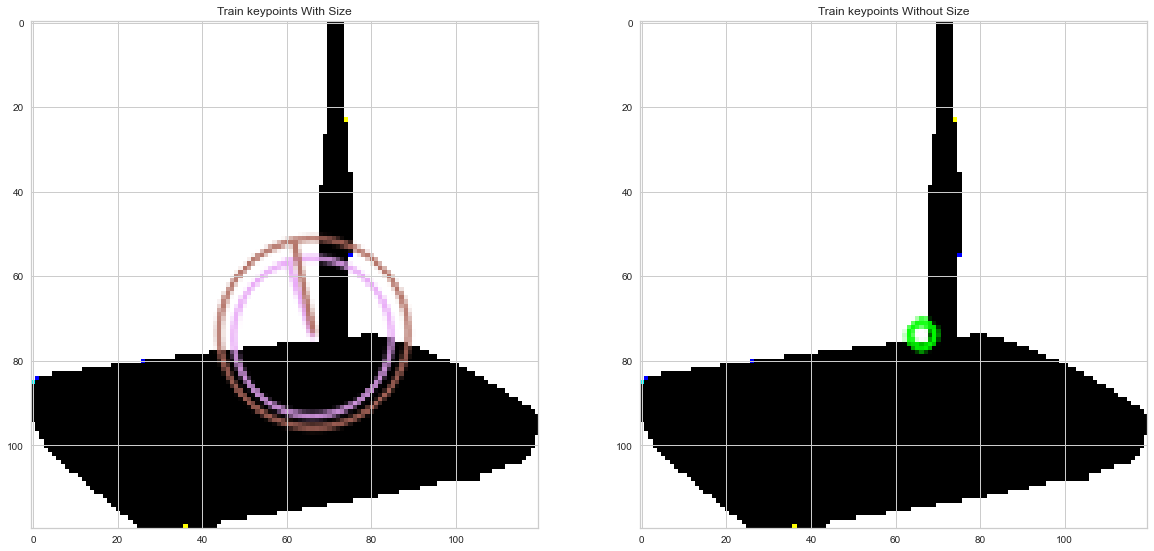

In [16]:

#  finding  key points of an image

training_image = cv2.cvtColor(x[2].astype('uint8') * 255, cv2.COLOR_BGR2RGB)
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

orb = cv2.ORB_create()

train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))


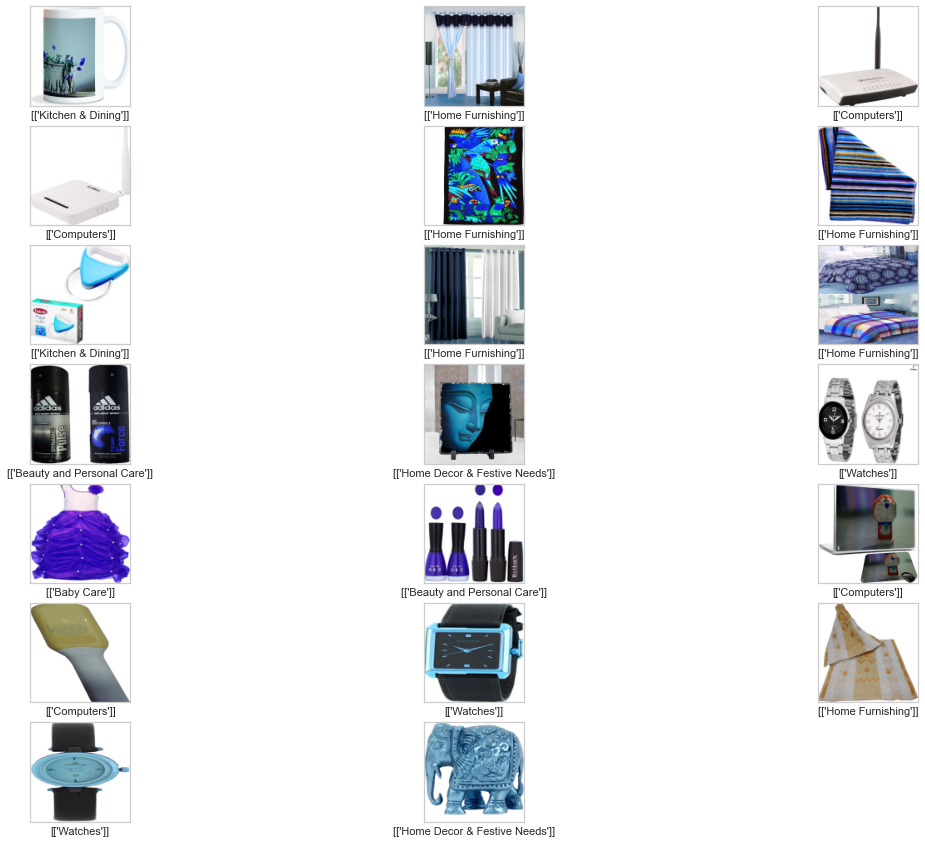

In [17]:
plt.figure(figsize=(20,15))
for i in range(len(y)):
    plt.subplot(7,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(data_gen.encoder.inverse_transform([y[i]]))
plt.show()

# CNN

In [18]:
model = models.Sequential()

model.add(layers.Conv2D(16, (3, 3), input_shape=(120, 120, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))  
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))  

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 118, 118, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 118, 118, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 57, 57, 32)       1

In [19]:
checkpoint = ModelCheckpoint('./ModelCheckpoints/'+'/{val_acc:.4}.hdf5', monitor='val_acc', verbose=0, save_best_only=True,
                                                    save_weights_only=False, mode='max', save_freq='epoch',options=None)
                                                    
optimizer = tf.keras.optimizers.Adam(learning_rate=0.000001, beta_1=0.9, beta_2=0.9, epsilon=1e-07, amsgrad=False)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['acc'])

In [20]:
# epochs=200


# history = model.fit(x=train_generator,
#                 steps_per_epoch=len(train_data)//batch_size,
#                 validation_data=valid_generator,
#                 validation_steps=len(test_data)//batch_size,
#                 epochs=epochs,
#                 callbacks=checkpoint,                
#                 verbose=1)    

In [21]:
# plt.plot(history.history['acc'], label='accuracy')
# plt.plot(history.history['val_acc'], label = 'val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')

In [22]:
model = tf.keras.models.load_model('ModelCheckpoints\\0.5474.hdf5')

In [23]:
model

In [24]:
test_loss, test_acc = model.evaluate(valid_generator, batch_size=batch_size,steps=len(test_data)//batch_size, verbose=1)

10/10 [==============================] - 11s 624ms/step - loss: 1.3073 - acc: 0.5474


In [25]:
test_generator = data_gen.data_generator1(test_data)
output = model.predict(test_generator, verbose=1, steps=len(test_data))
output = tf.argmax(output, axis=1)

210/210 [==============================] - 7s 34ms/step


In [26]:
pred=np.array(output)

In [27]:
test_data = np.array(test_data)

In [28]:
y=data_gen.encoder.transform(test_data[:,1].reshape(-1, 1)).toarray()

In [29]:
y=tf.argmax(y, axis=1)

# ARI for CNN

In [30]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(y, pred)

0.2559332094427576

In [31]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y, pred)

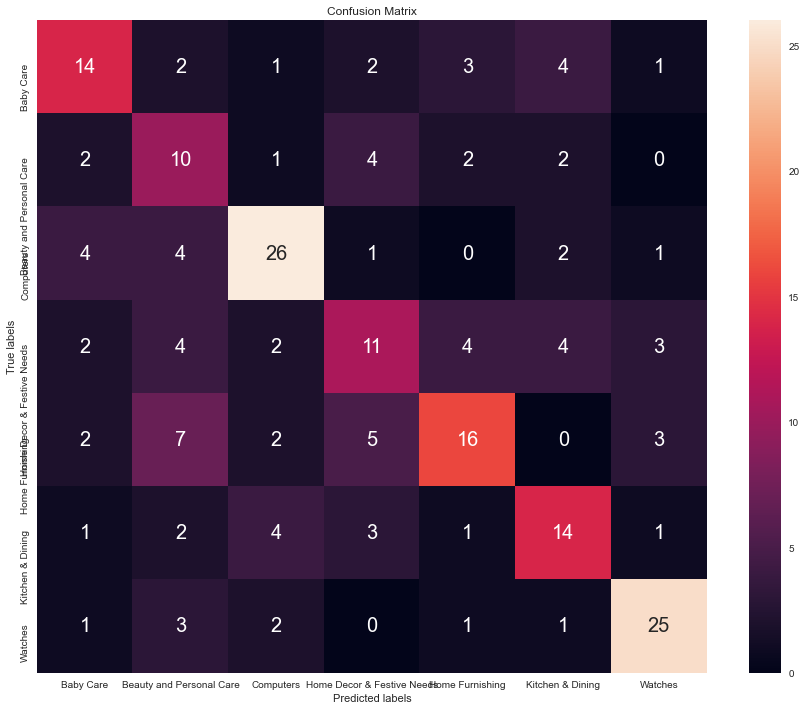

In [32]:
plt.figure(figsize=(15,12))
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax, annot_kws={"size": 20});  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(np.unique(test_data[:,1])); ax.yaxis.set_ticklabels(np.unique(test_data[:,1]));

In [33]:
import pandas as pd
results = pd.DataFrame(columns=['Model', 'Accuracy','ARI'])

In [34]:
print(test_acc)
results.at[0,'Model']='CNN'
results.at[0,'Accuracy']=test_acc
results.at[0,'ARI']=adjusted_rand_score(y, pred)

0.5473684072494507


In [35]:
x, y = next(valid_generator)
print(np.array(x).shape)
print(np.array(y).shape)

(20, 120, 120, 3)
(20, 7)


In [36]:
yhat = model.predict(x)

In [37]:
actual = data_gen.encoder.inverse_transform(y)
predicted = data_gen.encoder.inverse_transform(yhat)

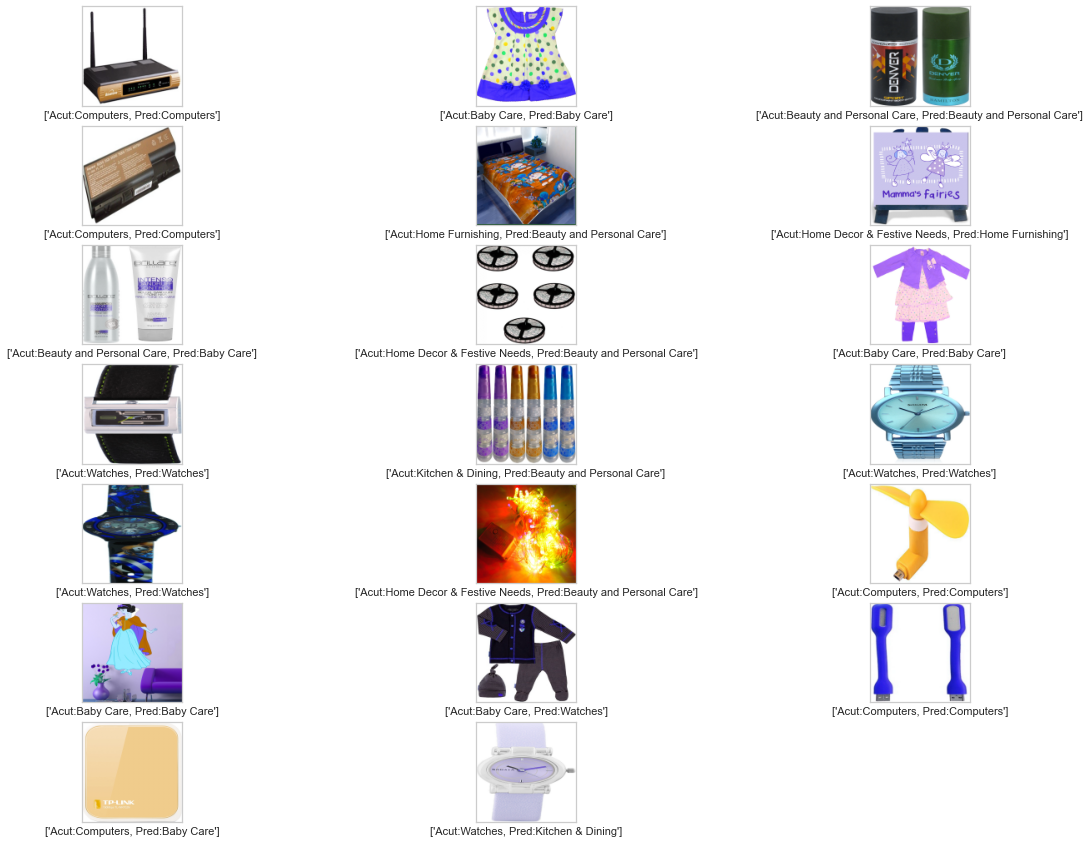

In [38]:
plt.figure(figsize=(20,15))
for i in range(len(y)):
    plt.subplot(7,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel('Acut:'+actual[i] + ', Pred:'+predicted[i])
plt.show()

# VGG16

In [39]:
import os
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import numpy as np

In [40]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['acc'])
    
    return model

In [41]:
input_shape = (120, 120, 3)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.9, epsilon=1e-07, amsgrad=False)
n_classes=7

n_steps = len(train_data) // batch_size
n_val_steps = len(test_data) // batch_size
n_epochs = 50

vgg_model = create_model(input_shape, n_classes, optimizer, fine_tune=0)

In [42]:
# checkpoint = ModelCheckpoint('./ModelCheckpoints/VGG'+'/{val_acc:.4}.hdf5', monitor='val_acc', verbose=0, save_best_only=True,
#                                                     save_weights_only=False, mode='max', save_freq='epoch',options=None)

# vgg_history = vgg_model.fit(x=train_generator,
#                             batch_size=batch_size,
#                             epochs=n_epochs,
#                             validation_data=valid_generator,
#                             steps_per_epoch=n_steps,
#                             validation_steps=n_val_steps,
#                             callbacks=checkpoint,
#                             verbose=1)

In [43]:
model = tf.keras.models.load_model('ModelCheckpoints\\VGG\\0.7842.hdf5')

In [44]:
test_loss, test_acc = model.evaluate(valid_generator, batch_size=batch_size,steps=len(test_data)//batch_size, verbose=1)

10/10 [==============================] - 6s 609ms/step - loss: 0.7679 - acc: 0.7842


In [45]:
test_generator = data_gen.data_generator1(test_data)
output = model.predict(test_generator, verbose=1, steps=len(test_data))
output = tf.argmax(output, axis=1)

210/210 [==============================] - 7s 34ms/step


In [46]:
pred=np.array(output)

In [47]:
test_data = np.array(test_data)

In [48]:
y=data_gen.encoder.transform(test_data[:,1].reshape(-1, 1)).toarray()

In [49]:
y=tf.argmax(y, axis=1)

# ARI for VGG16

In [50]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(y, pred)

0.5942281067296454

In [51]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y, pred)

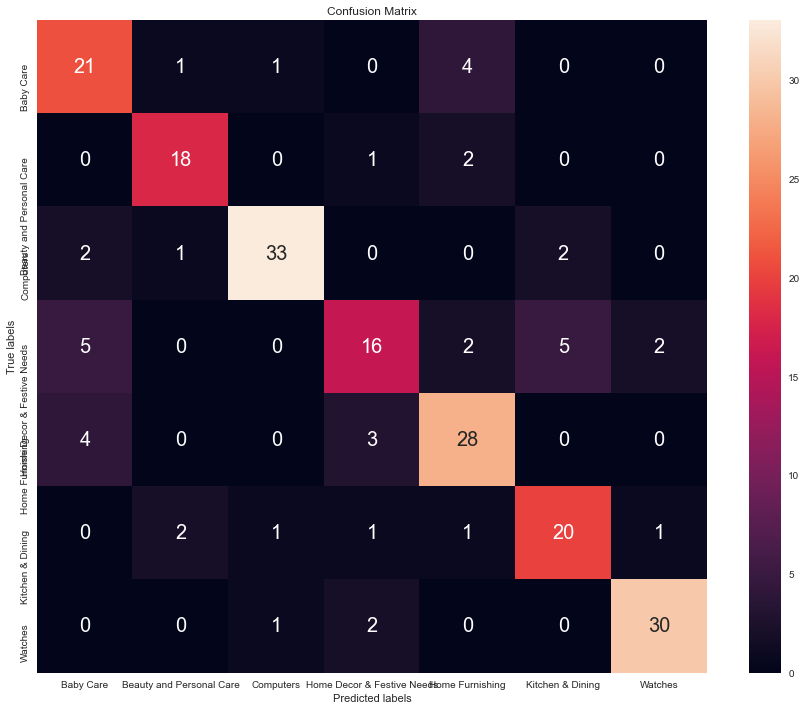

In [52]:
plt.figure(figsize=(15,12))
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax, annot_kws={"size": 20});  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(np.unique(test_data[:,1])); ax.yaxis.set_ticklabels(np.unique(test_data[:,1]));

In [53]:
results.at[1,'Model']='VGG16'
results.at[1,'Accuracy']=test_acc
results.at[1,'ARI']=adjusted_rand_score(y, pred)

In [54]:
results

Model  Accuracy       ARI
0    CNN  0.547368  0.255933
1  VGG16  0.784211  0.594228

In [55]:
x, y = next(valid_generator)
print(np.array(x).shape)
print(np.array(y).shape)

(20, 120, 120, 3)
(20, 7)


In [56]:
yhat = model.predict(x)

In [57]:
actual = data_gen.encoder.inverse_transform(y)
predicted = data_gen.encoder.inverse_transform(yhat)

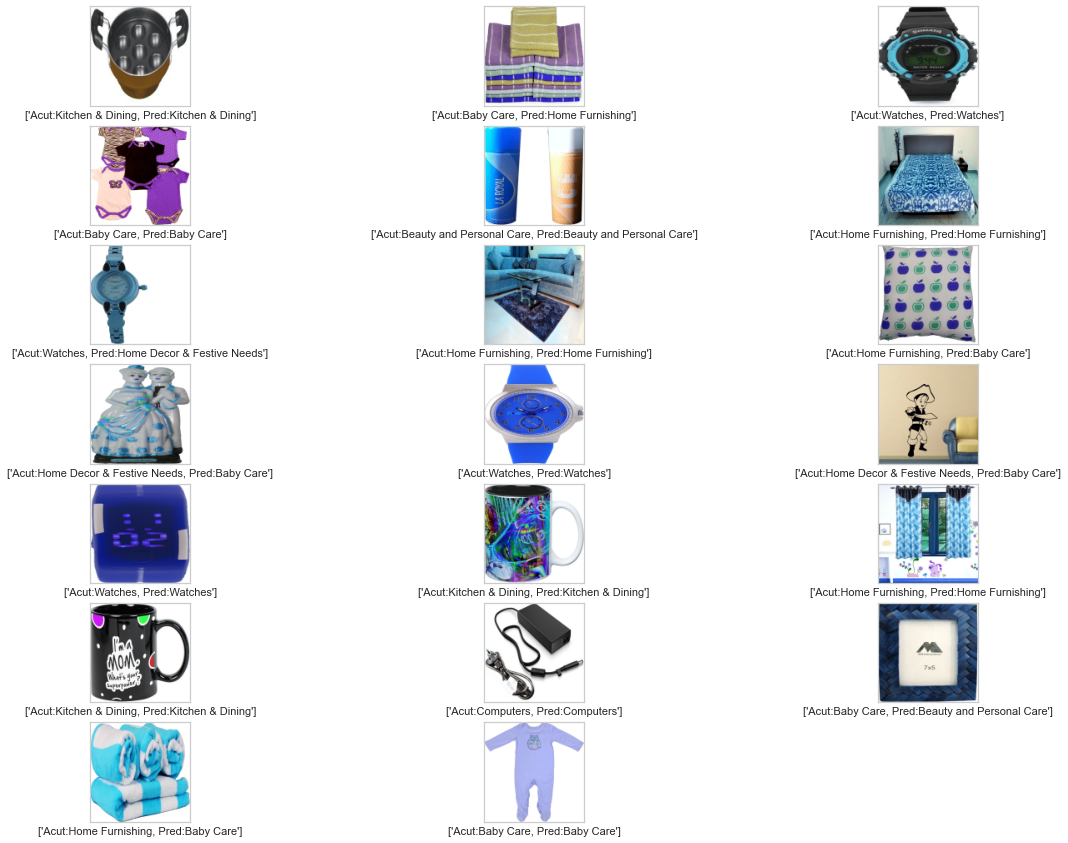

In [58]:
plt.figure(figsize=(20,15))
for i in range(len(y)):
    plt.subplot(7,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel('Acut:'+actual[i] + ', Pred:'+predicted[i])
plt.show()

# Image treatment

In [59]:
# image treatment of

In [60]:
#Create function for image treatment
def image_treatment(img):
    img_treated = Image.open(img) # Open image
    img_treated = img_treated.convert('L') # Convert to grayscale
    img_treated = ImageOps.equalize(img_treated) #Equalize distribution
    img_treated = img_treated.filter(ImageFilter.GaussianBlur(radius = 3)) # Blur
    img_treated = img_treated.resize((200,200)) #Resize to 200x200
    img_treated = np.array(img_treated)
    return img_treated

In [61]:
train_data = np.array(train_data)

In [62]:
#Load the numpy arrays for every image in the training set
#We skip some images due to some error that we cant pre-treat them
image_list_train = []
for i in train_data[:,0]:
    try:
        image_list_train.append(image_treatment(f"Images/{i}"))
    except:
        pass
    
#Randomizing list to test best number of clusters later on
random_image_list = image_list_train.copy()
random.shuffle(random_image_list) 
image_list_small = random_image_list[0:30]

In [63]:
# this is the image value
print(random_image_list[0])

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [64]:
test_data = np.array(test_data)

In [65]:
#Load the numpy arrays for every image in the testing set
image_list_test = []
for i in test_data[:,0]:
    try:
        image_list_test.append(image_treatment(f"Images/{i}"))
    except:
        pass

C:\PCANACONDA\anaconda3\lib\site-packages\PIL\Image.py:2855: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [66]:
# Create function to build the feature histograms
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_)) # Creates an array filled with zeros of length of the number of clusters
    cluster_result =  cluster_alg.predict(descriptor_list) # Assigns each feature to a cluster
    for i in cluster_result:
        histogram[i] += 1.0 #Adds a point for each feature assigned to a cluster
    return histogram

In [67]:
#Step 1 - Generate key points and descriptors on small dataset
# We will determine the ideal number of clusters to group the features into

#Generate SIFT
sift = cv2.xfeatures2d.SIFT_create()

#Generate list of descriptors
descriptors = []

for i in image_list_small:
    kp, des = sift.detectAndCompute(i, None) #Generate key points and descriptors for each image
    for d in des:
        descriptors.append(d) #Append descritors for every image to the descriptors list

In [68]:
wcss = []
for i in [100,200,300,400,500,600,700]:
    kmeans = cluster.KMeans(n_clusters=i, random_state=42)
    kmeans.fit(descriptors)
    # Sum of squared distances of samples to their closest cluster center.
    wcss.append(kmeans.inertia_)

In [69]:
# Kmeans on 100 to 700 clusters for Inertia


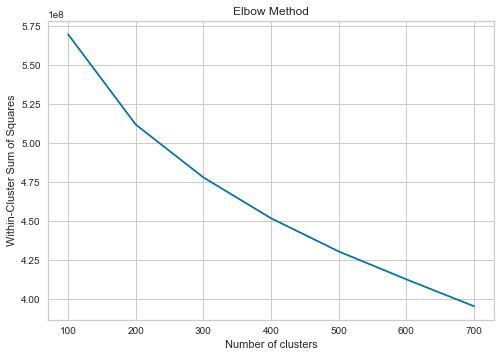

In [70]:
# Show Inertia Graph
plt.plot([100,200,300,400,500,600,700], wcss)
plt.title('Elbow Method')
#plt.xticks(range(1, 100))
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

In [71]:
#Step 1 - Generate key points and descriptors for training data

#Generate SIFT
sift = cv2.xfeatures2d.SIFT_create()

#Generate list of descriptors
descriptors = []

for i in image_list_train:
    kp, des = sift.detectAndCompute(i, None) #Generate key points and descriptors for each image
    for d in des:
        descriptors.append(d) #Append descritors for every image to the descriptors list

In [72]:
#### description of an image
descriptors[0]

array([107.,  85.,   5.,   0.,   0.,   0.,   1.,  13.,  83.,  35.,   0.,
         0.,   0.,   2.,  10.,  30.,  72.,   2.,   0.,   0.,   0.,   1.,
        14., 134.,  47.,   1.,   0.,   0.,   0.,   0.,   1., 103.,  52.,
        17.,   2.,   0.,   0.,  12., 134., 134., 121.,  19.,   0.,   0.,
         0.,  72., 122.,  49., 134.,  13.,   0.,   0.,   0.,   4.,   8.,
        85.,  22.,   1.,   0.,   0.,   0.,   0.,   2.,  49.,   1.,   0.,
         0.,   0.,   1.,  26., 134., 120.,  17.,   0.,   0.,   0.,   3.,
       134., 127.,  21., 134.,   9.,   0.,   0.,   0.,  32.,  46.,  54.,
        29.,   4.,   0.,   0.,   0.,   0.,   0.,   3.,   2.,   2.,   2.,
         1.,   1.,   1.,   2.,   6.,   0.,   0.,   1.,   2.,   6.,  28.,
         6.,   1.,   7.,   0.,   0.,   0.,   0.,  11.,   9.,   6.,   2.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.], dtype=float32)

In [73]:
#Step 2 - Generate clusters

kmeans = KMeans(n_clusters = 7)
kmeans.fit(descriptors)

KMeans(n_clusters=7)

In [74]:
#Step 3 - Generate histograms for every image in the training data

histogram_list = []
for i in image_list_train:
    kp, des = sift.detectAndCompute(i, None)
    if (des is not None):
        histogram = build_histogram(des.astype(np.float64), kmeans)
        histogram_list.append(histogram)

In [122]:
###### this is on image treatment on 7 but we can make it up to 200

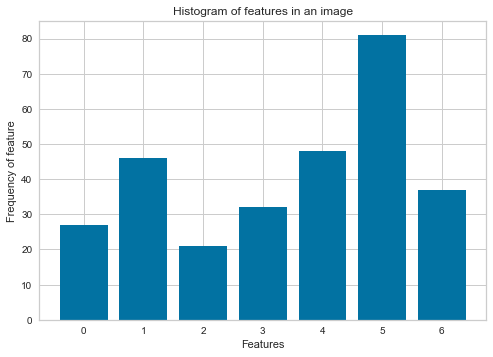

In [75]:
#Example of a histogram
plt.bar(x = range(0,len(kmeans.cluster_centers_)), height = histogram_list[0])
plt.title('Histogram of features in an image')
plt.ylabel('Frequency of feature')
plt.xlabel('Features')
plt.show()

In [76]:
X_train = np.array(histogram_list)
y_train = train_data[:,1]

In [77]:
histogram_list_test = []
for i in image_list_test:
    kp, des = sift.detectAndCompute(i, None)
    if (des is not None):
        histogram = build_histogram(des.astype(np.float64), kmeans)
        histogram_list_test.append(histogram)

In [78]:
X_test = np.array(histogram_list_test)
y_test = test_data[:,1]

# Dimensional Reduction (KPCA,PCA, SVD)

In [ ]:
##  training the Kmeans of images because they are on 3d format ( 3 colours) reduce the damage of image to vectors

# in short converting colours into numbers

In [79]:
X_image_full = np.concatenate([X_train, X_test])

In [80]:
X_image_full.shape

(1050, 7)

In [81]:
print(X_train[0])

[27. 46. 21. 32. 48. 81. 37.]


In [82]:
X_image_full[0]

array([27., 46., 21., 32., 48., 81., 37.])

In [84]:
y_image_full = np.concatenate([y_train, y_test])#### labeling the class of the DATA

In [85]:
pca = PCA(n_components=7, random_state=42)#### dimensional reduction for PCA
X_image_pca=pca.fit_transform(X_image_full)

In [86]:
X_image_pca[0]

array([-19.20786131, -38.69802819,  10.9298605 , -11.45218346,
       -23.27473738, -24.77831131,   1.98117295])

In [87]:
kpca = KernelPCA(n_components=7, kernel='poly', gamma=10)
X_kpca = kpca.fit_transform(X_image_full)

In [88]:
X_kpca[0]

array([-1.43246609e+08,  2.14592688e+07,  1.48648359e+07,  1.09427978e+07,
       -6.89580859e+05, -5.44468784e+06,  1.99626663e+07])

In [90]:
svd = TruncatedSVD(n_components=6, n_iter=7, random_state=42) #### dimensional reduction for SVD
X_trSVD = svd.fit_transform(X_image_full)

In [91]:
X_trSVD[0]

array([102.21294166, -49.80784037,  18.59237148, -10.34001404,
       -22.56882694, -25.49738061])

In [92]:
# Visualize t-SNE with different levels of perplexity

In [93]:
## K Means for SVD

In [94]:
# Find optimal number of clusters
# Method obtained from: https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

wcss = []
for i in range(1, 100):
    kmeans = cluster.KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_trSVD)
    # Sum of squared distances of samples to their closest cluster center.
    wcss.append(kmeans.inertia_)

C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [95]:
silhouette_avg = []
davies_bouldin = []

for i in range(2, 100):
    clusterer = cluster.KMeans(n_clusters=i, random_state=42)
    cluster_labels = clusterer.fit_predict(X_trSVD)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg.append(silhouette_score(X_trSVD, cluster_labels))

    # clusters which are farther apart and less dispersed will result in a better score (closer to 0)
    davies_bouldin.append(davies_bouldin_score(X_trSVD, cluster_labels))

In [ ]:
#### silouhette score KMeans on the SVD

In [96]:
clusterer = cluster.KMeans(n_clusters=7, random_state=42)
cluster_labels = clusterer.fit_predict(X_trSVD)
print('Silhouette Score :'+str(silhouette_score(X_trSVD, cluster_labels)))

Silhouette Score :0.30468082438318944


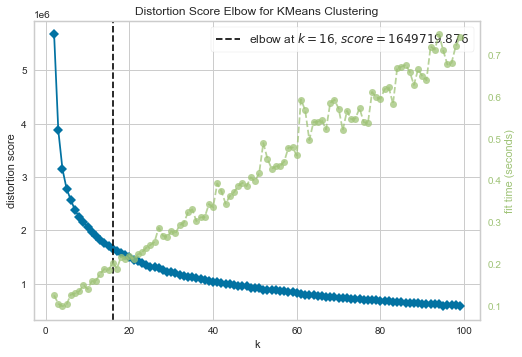

In [97]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 100))

visualizer.fit(X_trSVD)
visualizer.show() 
K_kmean=visualizer.elbow_value_
Score_kmean=visualizer.elbow_score_

In [ ]:
### silouhette score KMeans on the PCA

In [98]:
silhouette_avg = []
davies_bouldin = []

for i in range(2, 100):
    clusterer = cluster.KMeans(n_clusters=i, random_state=42)
    cluster_labels = clusterer.fit_predict(X_image_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg.append(silhouette_score(X_image_pca, cluster_labels))

    # clusters which are farther apart and less dispersed will result in a better score (closer to 0)
    davies_bouldin.append(davies_bouldin_score(X_image_pca, cluster_labels))

In [99]:
clusterer = cluster.KMeans(n_clusters=7, random_state=42)
cluster_labels = clusterer.fit_predict(X_image_pca)
print('Silhouette Score :'+str(silhouette_score(X_image_pca, cluster_labels)))

Silhouette Score :0.29646860338763287


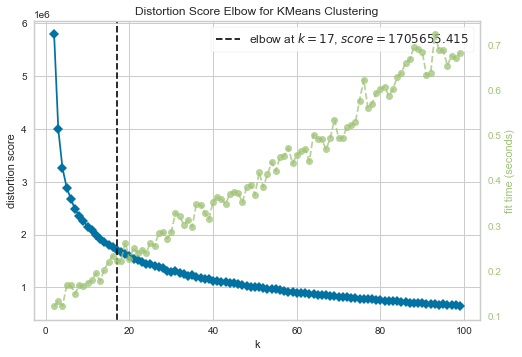

In [100]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 100))

visualizer.fit(X_image_pca)
visualizer.show() 
K_kmean=visualizer.elbow_value_
Score_kmean=visualizer.elbow_score_

In [ ]:
### silouhette score KMeans on the KPCA

In [101]:
silhouette_avg = []
davies_bouldin = []

for i in range(2, 100):
    clusterer = cluster.KMeans(n_clusters=i, random_state=42)
    cluster_labels = clusterer.fit_predict(X_kpca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg.append(silhouette_score(X_kpca, cluster_labels))

    # clusters which are farther apart and less dispersed will result in a better score (closer to 0)
    davies_bouldin.append(davies_bouldin_score(X_kpca, cluster_labels))

In [102]:
clusterer = cluster.KMeans(n_clusters=7, random_state=42)
cluster_labels = clusterer.fit_predict(X_kpca)
print('Silhouette Score :'+str(silhouette_score(X_kpca, cluster_labels)))

Silhouette Score :0.7738716768454966


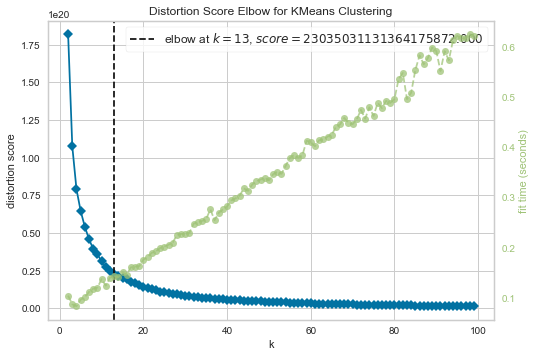

In [103]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 100))

visualizer.fit(X_kpca)
visualizer.show() 
K_kmean=visualizer.elbow_value_
Score_kmean=visualizer.elbow_score_

# Silhouette

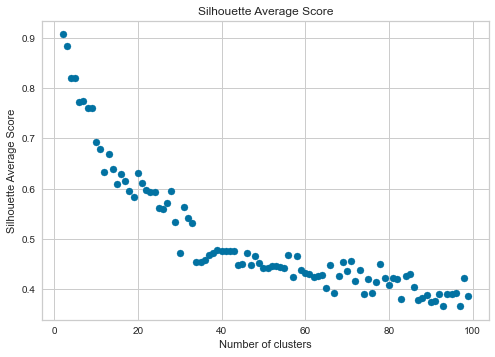

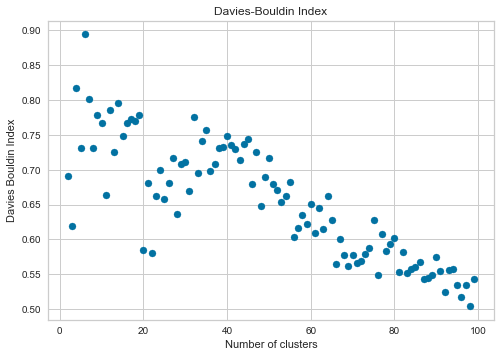

In [105]:
# Show Silhouette Graph
plt.scatter(range(2, 100), silhouette_avg)
plt.title('Silhouette Average Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Average Score')
plt.show()

# Show Davies Bouldin Graph
plt.scatter(range(2, 100), davies_bouldin)
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Index')
plt.show()

# t-SNE visualization with k means clustring

# Tsne with SVD

In [106]:
actual=np.unique(train_data[:,1])

C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


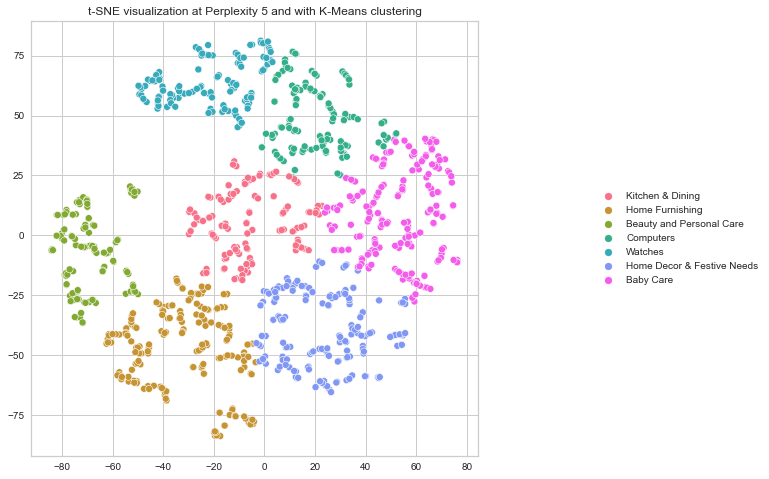

C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


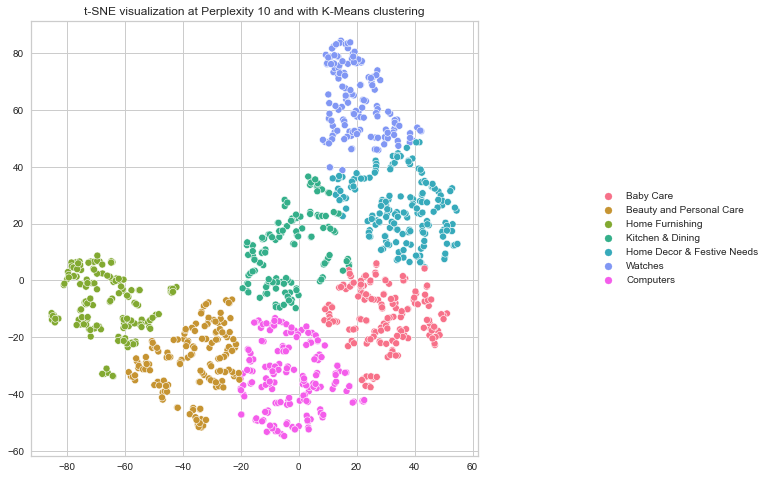

C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


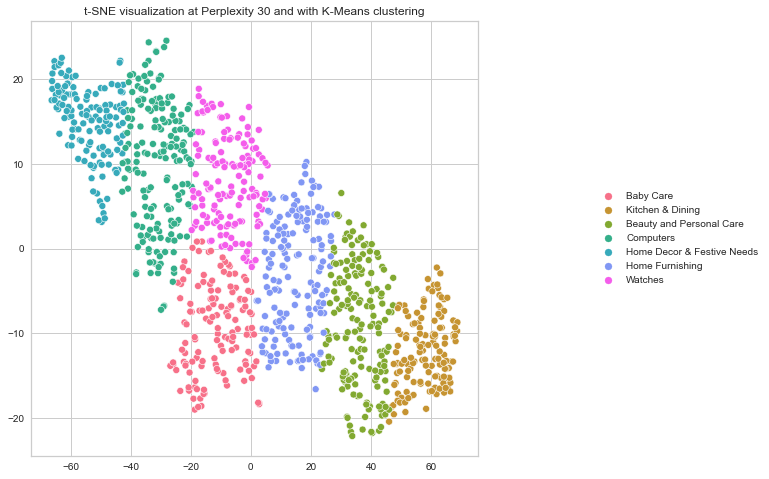

C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


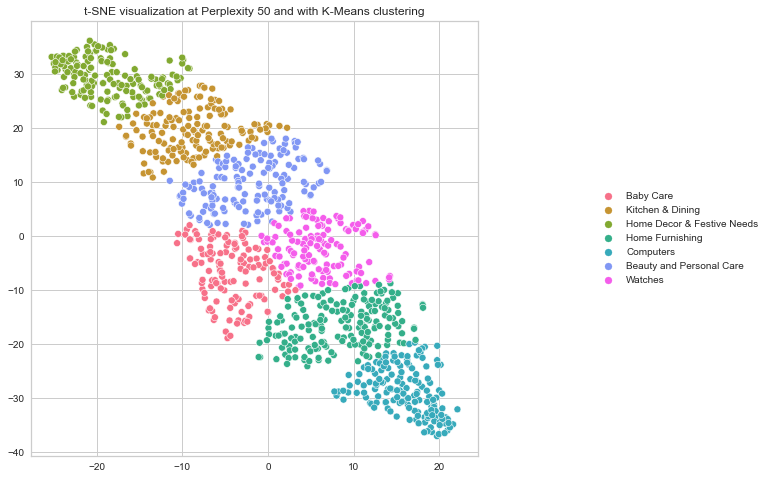

C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


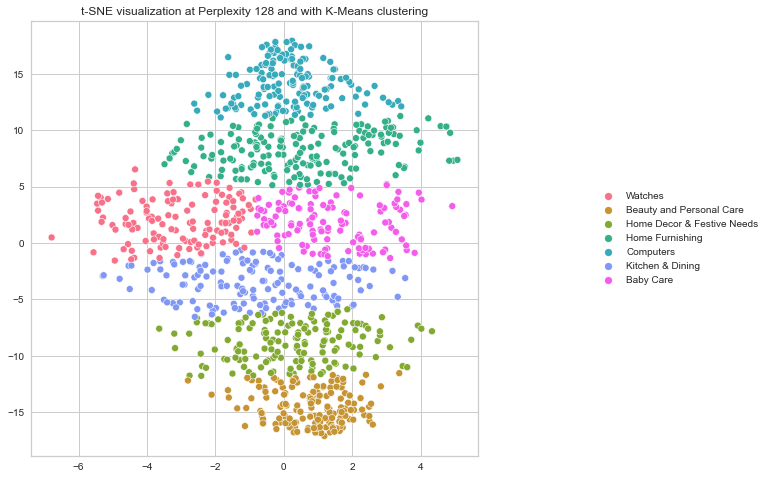

In [108]:
perplex_list = [5, 10, 30, 50, 128]
for i in perplex_list:
    # Run t-SNE
    tsne = TSNE(n_components=2, perplexity=i, random_state=42)
    T = tsne.fit_transform(X_trSVD)
    if i==50:
        tempTnse=pd.DataFrame(T,columns=['Tnse1','Tnse2'])
    # Create cluster with 7 clusters
    n_clusters = 7
    clust = cluster.KMeans(n_clusters=n_clusters, random_state=42)
    clust.fit(T)
    # Visualize
    labels=pd.DataFrame(clust.labels_,columns=['Labels'])
    labels['Labels']=labels['Labels'].astype(str)
    labels['Labels'] = labels['Labels'].str.replace('0',actual[0])
    labels['Labels'] = labels['Labels'].str.replace('1',actual[1])
    labels['Labels'] = labels['Labels'].str.replace('2',actual[2])
    labels['Labels'] = labels['Labels'].str.replace('3',actual[3])
    labels['Labels'] = labels['Labels'].str.replace('4',actual[4])
    labels['Labels'] = labels['Labels'].str.replace('5',actual[5])
    labels['Labels'] = labels['Labels'].str.replace('6',actual[6])

    plt.figure(figsize=(8, 8))
    plt.title('t-SNE visualization at Perplexity '+str(i)+' and with K-Means clustering')
    g=sns.scatterplot(T[:, 0], T[:, 1], hue=labels.values.reshape(1, -1)[0], legend = True)
    g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
    plt.show()

# Tsne with PCA

C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


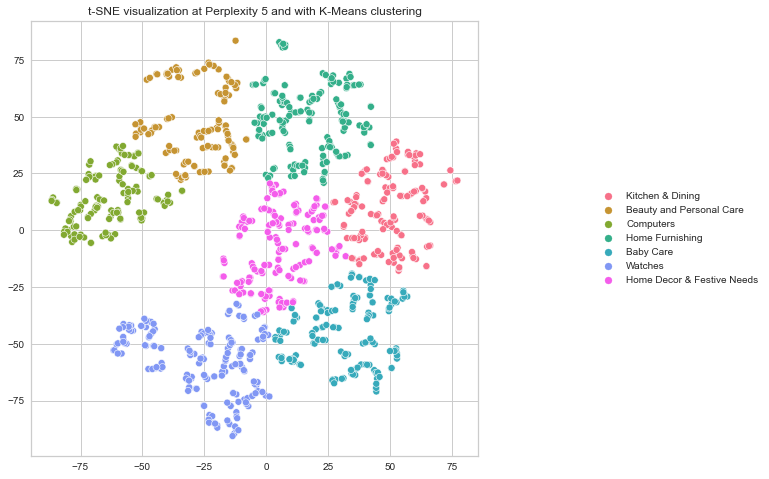

C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


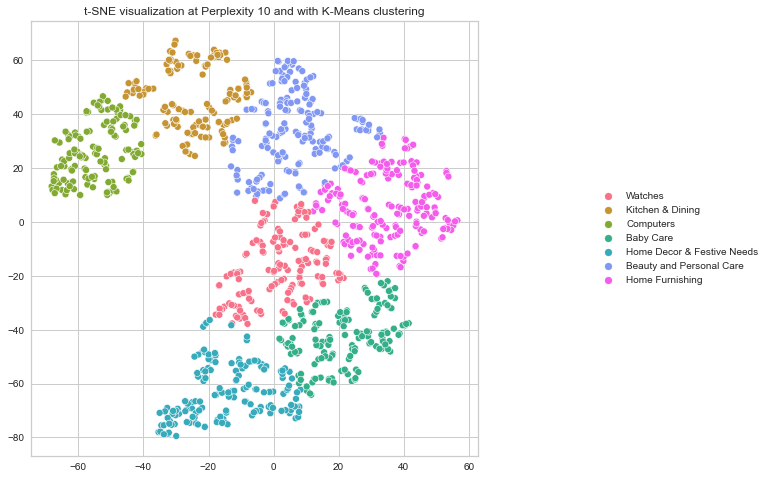

C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


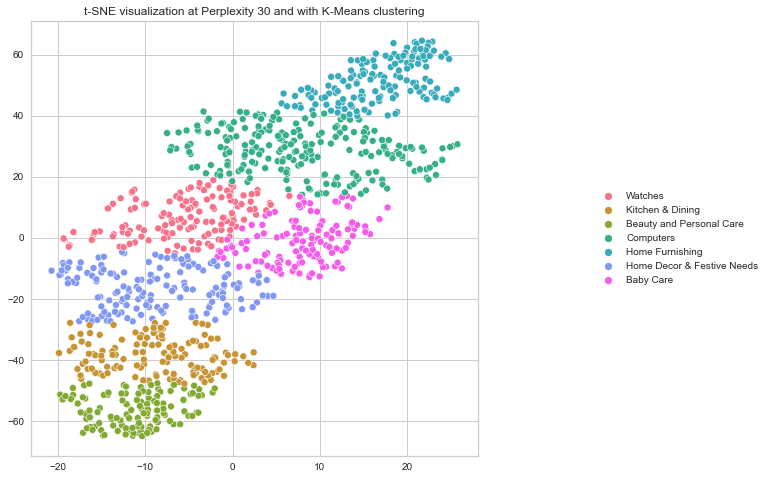

C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


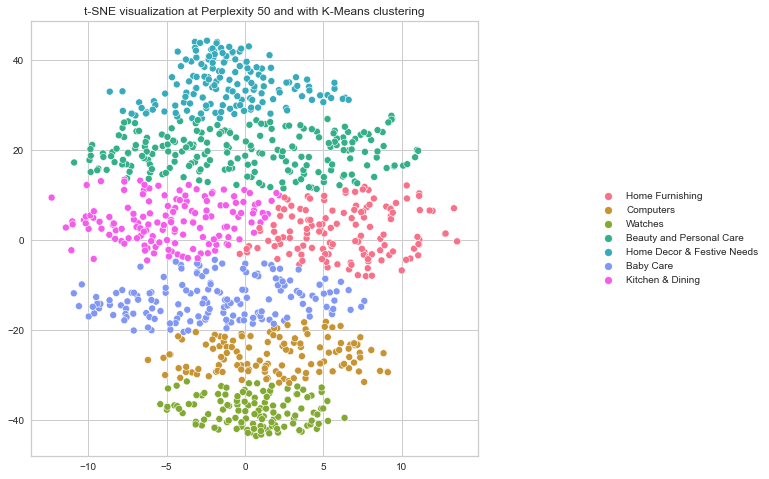

C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


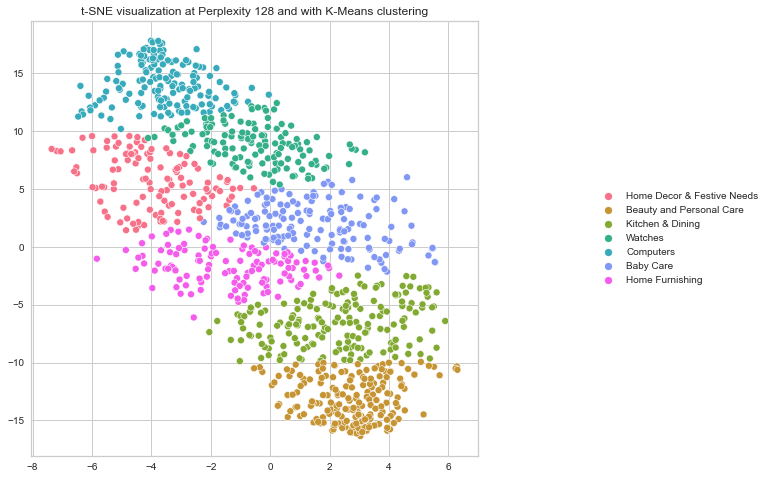

In [90]:
perplex_list = [5, 10, 30, 50, 128]
for i in perplex_list:
    # Run t-SNE
    tsne = TSNE(n_components=2, perplexity=i, random_state=42)
    T = tsne.fit_transform(X_image_pca)
#     Create cluster with 7 clusters
    n_clusters = 7
    clust = cluster.KMeans(n_clusters=n_clusters, random_state=42)
    clust.fit(T)
    # Visualize
    labels=pd.DataFrame(clust.labels_,columns=['Labels'])
    labels['Labels']=labels['Labels'].astype(str)
    labels['Labels'] = labels['Labels'].str.replace('0',actual[0])
    labels['Labels'] = labels['Labels'].str.replace('1',actual[1])
    labels['Labels'] = labels['Labels'].str.replace('2',actual[2])
    labels['Labels'] = labels['Labels'].str.replace('3',actual[3])
    labels['Labels'] = labels['Labels'].str.replace('4',actual[4])
    labels['Labels'] = labels['Labels'].str.replace('5',actual[5])
    labels['Labels'] = labels['Labels'].str.replace('6',actual[6])

    plt.figure(figsize=(8, 8))
    plt.title('t-SNE visualization at Perplexity '+str(i)+' and with K-Means clustering')
    g=sns.scatterplot(T[:, 0], T[:, 1], hue=labels.values.reshape(1, -1)[0], legend = True)
    g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
    plt.show()

# Tsne with Kpca

C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


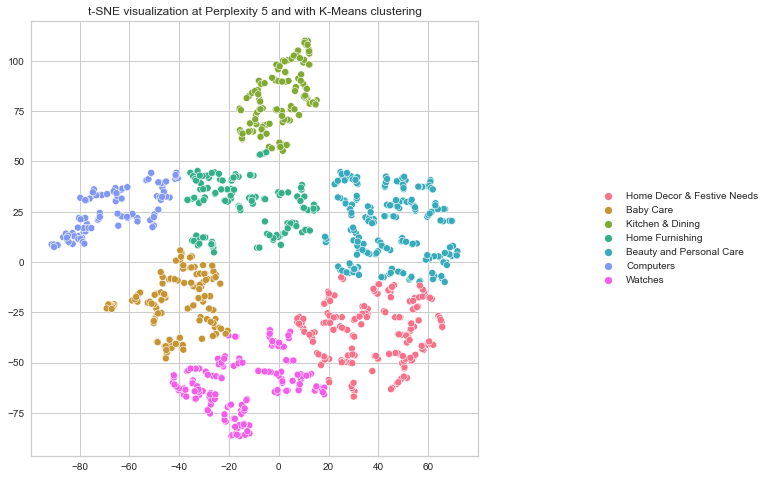

C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


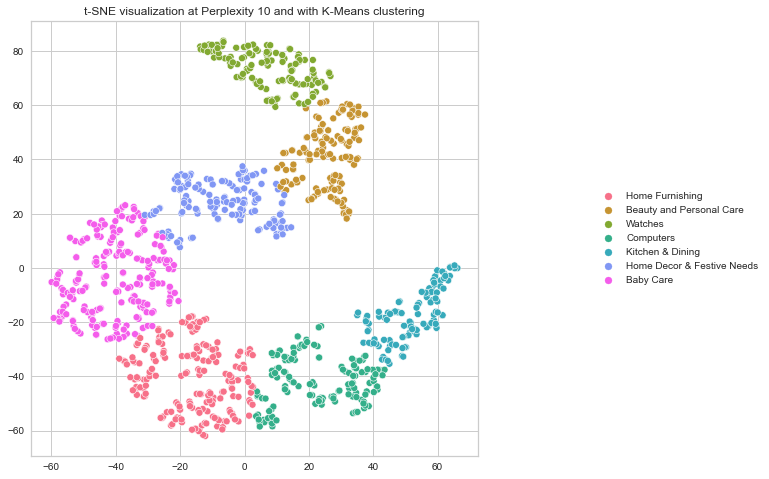

C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


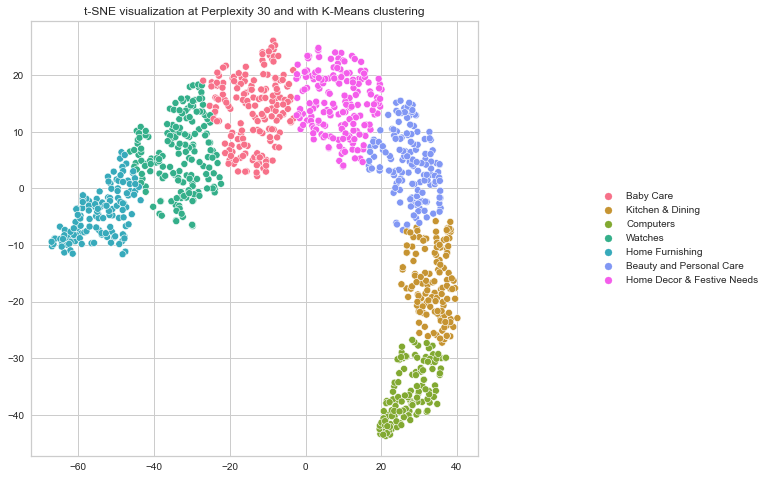

C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


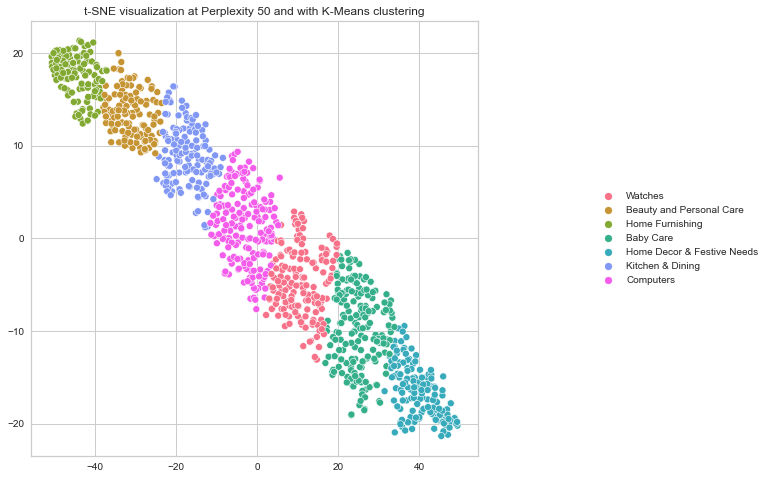

C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


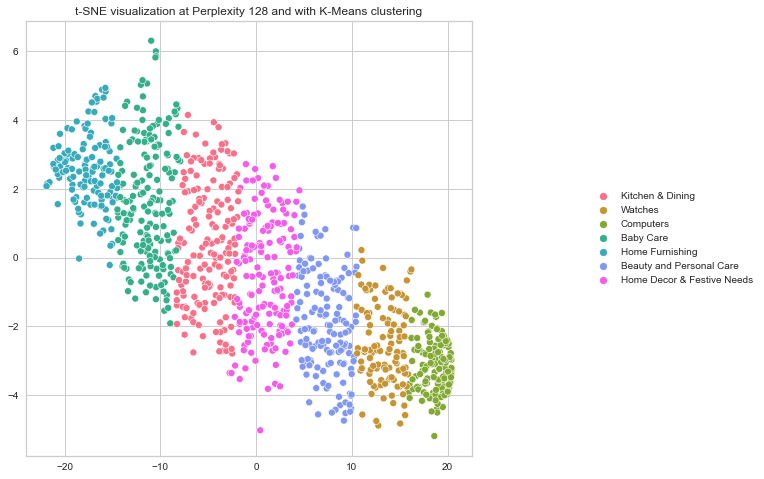

In [91]:
perplex_list = [5, 10, 30, 50, 128]
for i in perplex_list:
    # Run t-SNE
    tsne = TSNE(n_components=2, perplexity=i, random_state=42)
    T = tsne.fit_transform(X_kpca)
    
    # Create cluster with 7 clusters
    n_clusters = 7
    clust = cluster.KMeans(n_clusters=n_clusters, random_state=42)
    clust.fit(T)
    # Visualize
    labels=pd.DataFrame(clust.labels_,columns=['Labels'])
    labels['Labels']=labels['Labels'].astype(str)
    labels['Labels'] = labels['Labels'].str.replace('0',actual[0])
    labels['Labels'] = labels['Labels'].str.replace('1',actual[1])
    labels['Labels'] = labels['Labels'].str.replace('2',actual[2])
    labels['Labels'] = labels['Labels'].str.replace('3',actual[3])
    labels['Labels'] = labels['Labels'].str.replace('4',actual[4])
    labels['Labels'] = labels['Labels'].str.replace('5',actual[5])
    labels['Labels'] = labels['Labels'].str.replace('6',actual[6])

    plt.figure(figsize=(8, 8))
    plt.title('t-SNE visualization at Perplexity '+str(i)+' and with K-Means clustering')
    g=sns.scatterplot(T[:, 0], T[:, 1], hue=labels.values.reshape(1, -1)[0], legend = True)
    g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
    plt.show()

# Prediction with SVD Kmeans

In [92]:
result = pd.DataFrame(y_image_full,columns=['category'])

In [93]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
T = tsne.fit_transform(X_trSVD)# Svd for image data

n_clusters = 7
clust = cluster.KMeans(n_clusters=n_clusters, random_state=42)
clust.fit(T)
# Visualize
labels=pd.DataFrame(clust.labels_,columns=['Groups'])
toPredict=pd.concat([result, labels], axis=1)
result=pd.concat([result, labels], axis=1)


C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [94]:
result=result.groupby(['Groups','category']).size().reset_index(name='counts')

In [95]:
result

Groups                    category  counts
0        0                   Baby Care      21
1        0    Beauty and Personal Care      17
2        0                   Computers      11
3        0  Home Decor & Festive Needs      18
4        0             Home Furnishing      22
5        0            Kitchen & Dining      10
6        0                     Watches      46
7        1                   Baby Care       7
8        1    Beauty and Personal Care      17
9        1                   Computers      76
10       1  Home Decor & Festive Needs      11
11       1             Home Furnishing       5
12       1            Kitchen & Dining      43
13       1                     Watches      21
14       2                   Baby Care      19
15       2    Beauty and Personal Care      24
16       2                   Computers      10
17       2  Home Decor & Festive Needs      27
18       2             Home Furnishing      23
19       2            Kitchen & Dining      16
20       2                     Watches      12
21       3                   Baby Care      14
22       3    Beauty and Personal Care      37
23       3                   Computers      14
24       3  Home Decor & Festive Needs      19
25       3             Home Furnishing      10
26       3            Kitchen & Dining      26
27       3                     Watches      10
28       4                   Baby Care      23
29       4    Beauty and Personal Care      35
30       4                   Computers      31
31       4  Home Decor & Festive Needs      16
32       4             Home Furnishing      15
33       4            Kitchen & Dining      41
34       4                     Watches      43
35       5                   Baby Care      24
36       5    Beauty and Personal Care       8
37       5                   Computers       4
38       5  Home Decor & Festive Needs      22
39       5             Home Furnishing      23
40       5            Kitchen & Dining       7
41       5                     Watches      15
42       6                   Baby Care      42
43       6    Beauty and Personal Care      12
44       6                   Computers       4
45       6  Home Decor & Festive Needs      37
46       6             Home Furnishing      52
47       6            Kitchen & Dining       7
48       6                     Watches       3

In [96]:
result = pd.pivot_table(result, values='counts',index=['category'], columns=['Groups'], aggfunc=np.sum)
result.fillna(0, inplace=True)

In [97]:
result

Groups                       0   1   2   3   4   5   6
category                                              
Baby Care                   21   7  19  14  23  24  42
Beauty and Personal Care    17  17  24  37  35   8  12
Computers                   11  76  10  14  31   4   4
Home Decor & Festive Needs  18  11  27  19  16  22  37
Home Furnishing             22   5  23  10  15  23  52
Kitchen & Dining            10  43  16  26  41   7   7
Watches                     46  21  12  10  43  15   3

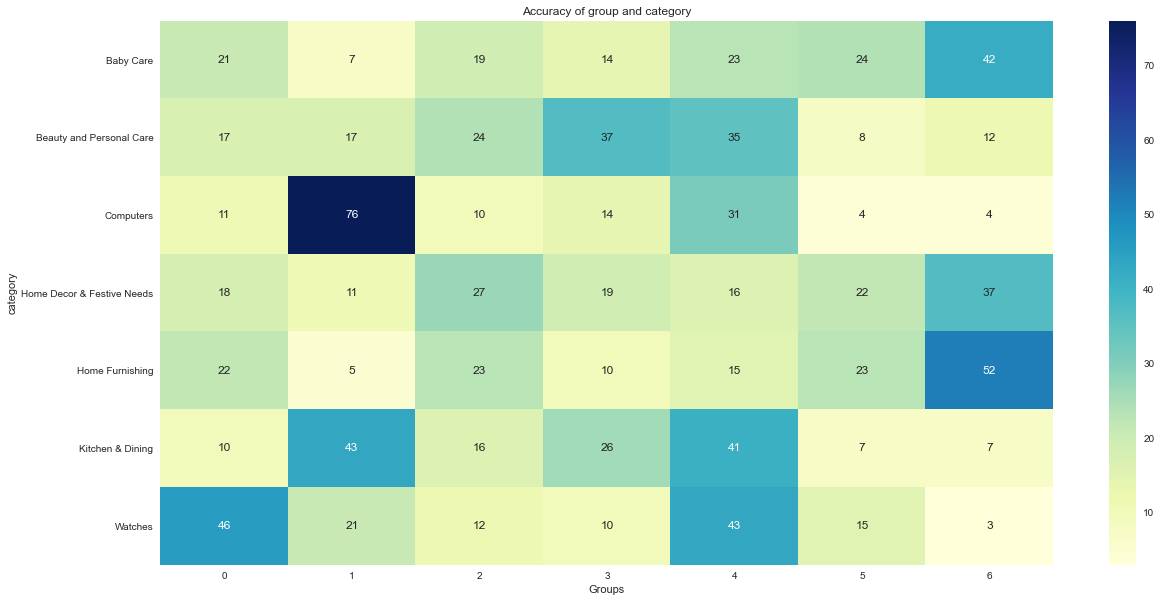

In [98]:
plt.figure(figsize=(20,10))
sns.heatmap(result, cmap="YlGnBu", annot=True,fmt='g')
plt.title('Accuracy of group and category')
plt.show()

# Prediction with PCA Kmeans

In [99]:
result = pd.DataFrame(y_image_full,columns=['category'])

In [100]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
T = tsne.fit_transform(X_image_pca) #Pca was chanegs here

n_clusters = 7
clust = cluster.KMeans(n_clusters=n_clusters, random_state=42)
clust.fit(T)
# Visualize
labels=pd.DataFrame(clust.labels_,columns=['Groups'])
toPredict=pd.concat([result, labels], axis=1)
result=pd.concat([result, labels], axis=1)


C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [101]:
result=result.groupby(['Groups','category']).size().reset_index(name='counts')

In [102]:
result

Groups                    category  counts
0        0                   Baby Care      11
1        0    Beauty and Personal Care      35
2        0                   Computers      10
3        0  Home Decor & Festive Needs      22
4        0             Home Furnishing      10
5        0            Kitchen & Dining      21
6        0                     Watches      16
7        1                   Baby Care       4
8        1    Beauty and Personal Care      10
9        1                   Computers      57
10       1  Home Decor & Festive Needs       6
11       1             Home Furnishing       2
12       1            Kitchen & Dining      31
13       1                     Watches      13
14       2                   Baby Care      41
15       2    Beauty and Personal Care      30
16       2                   Computers      13
17       2  Home Decor & Festive Needs      44
18       2             Home Furnishing      49
19       2            Kitchen & Dining      22
20       2                     Watches      26
21       3                   Baby Care      22
22       3    Beauty and Personal Care      22
23       3                   Computers      15
24       3  Home Decor & Festive Needs      15
25       3             Home Furnishing      18
26       3            Kitchen & Dining      27
27       3                     Watches      39
28       4                   Baby Care      40
29       4    Beauty and Personal Care      12
30       4                   Computers       4
31       4  Home Decor & Festive Needs      37
32       4             Home Furnishing      46
33       4            Kitchen & Dining       6
34       4                     Watches       1
35       5                   Baby Care       9
36       5    Beauty and Personal Care      23
37       5                   Computers      39
38       5  Home Decor & Festive Needs       8
39       5             Home Furnishing       7
40       5            Kitchen & Dining      28
41       5                     Watches      22
42       6                   Baby Care      23
43       6    Beauty and Personal Care      18
44       6                   Computers      12
45       6  Home Decor & Festive Needs      18
46       6             Home Furnishing      18
47       6            Kitchen & Dining      15
48       6                     Watches      33

In [103]:
result = pd.pivot_table(result, values='counts',index=['category'], columns=['Groups'], aggfunc=np.sum)
result.fillna(0, inplace=True)

In [104]:
result

Groups                       0   1   2   3   4   5   6
category                                              
Baby Care                   11   4  41  22  40   9  23
Beauty and Personal Care    35  10  30  22  12  23  18
Computers                   10  57  13  15   4  39  12
Home Decor & Festive Needs  22   6  44  15  37   8  18
Home Furnishing             10   2  49  18  46   7  18
Kitchen & Dining            21  31  22  27   6  28  15
Watches                     16  13  26  39   1  22  33

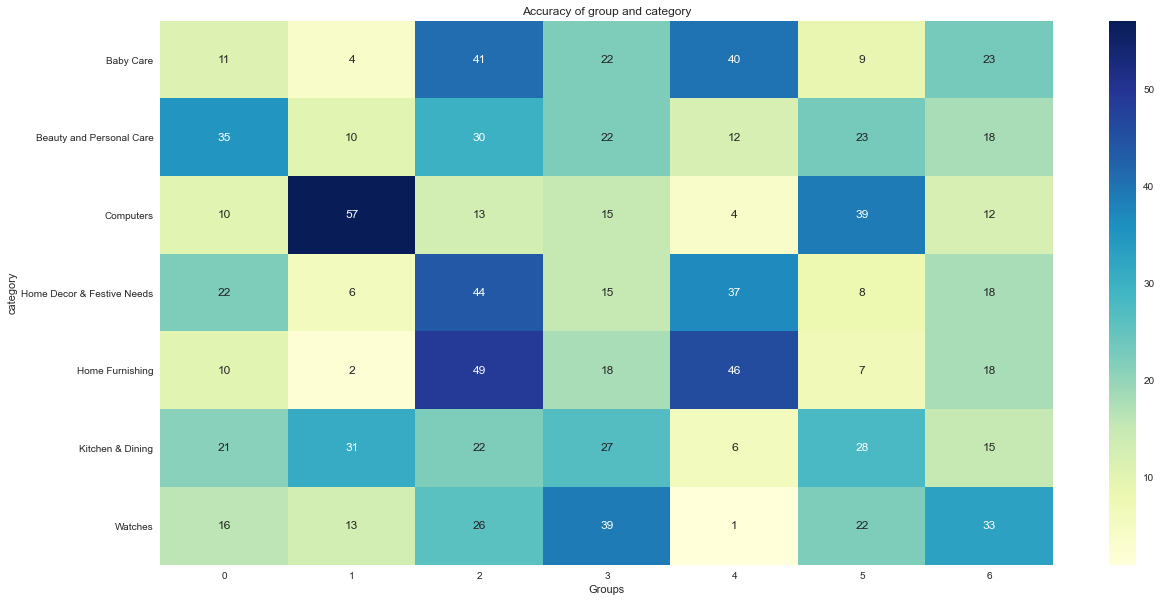

In [105]:
plt.figure(figsize=(20,10))
sns.heatmap(result, cmap="YlGnBu", annot=True,fmt='g')
plt.title('Accuracy of group and category')
plt.show()

In [ ]:
# Prediction with KPCA Kmeans

In [115]:
result = pd.DataFrame(y_image_full,columns=['category'])

In [116]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
T = tsne.fit_transform(X_kpca) #Pca was chanegs here

n_clusters = 7
clust = cluster.KMeans(n_clusters=n_clusters, random_state=42)
clust.fit(T)
# Visualize
labels=pd.DataFrame(clust.labels_,columns=['Groups'])
toPredict=pd.concat([result, labels], axis=1)
result=pd.concat([result, labels], axis=1)


C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\PCANACONDA\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [117]:
result=result.groupby(['Groups','category']).size().reset_index(name='counts')

In [118]:
result

Groups                    category  counts
0        0                   Baby Care      28
1        0    Beauty and Personal Care      37
2        0                   Computers      17
3        0  Home Decor & Festive Needs      24
4        0             Home Furnishing      19
5        0            Kitchen & Dining      24
6        0                     Watches      40
7        1                   Baby Care       4
8        1    Beauty and Personal Care       8
9        1                   Computers      59
10       1  Home Decor & Festive Needs       6
11       1             Home Furnishing       3
12       1            Kitchen & Dining      30
13       1                     Watches      13
14       2                   Baby Care      34
15       2    Beauty and Personal Care      16
16       2                   Computers      13
17       2  Home Decor & Festive Needs      33
18       2             Home Furnishing      36
19       2            Kitchen & Dining      15
20       2                     Watches      15
21       3                   Baby Care      19
22       3    Beauty and Personal Care      26
23       3                   Computers      20
24       3  Home Decor & Festive Needs      15
25       3             Home Furnishing      15
26       3            Kitchen & Dining      28
27       3                     Watches      37
28       4                   Baby Care      34
29       4    Beauty and Personal Care       8
30       4                   Computers       1
31       4  Home Decor & Festive Needs      28
32       4             Home Furnishing      41
33       4            Kitchen & Dining       4
34       4                     Watches       1
35       5                   Baby Care      22
36       5    Beauty and Personal Care      28
37       5                   Computers       5
38       5  Home Decor & Festive Needs      36
39       5             Home Furnishing      31
40       5            Kitchen & Dining      20
41       5                     Watches      23
42       6                   Baby Care       9
43       6    Beauty and Personal Care      27
44       6                   Computers      35
45       6  Home Decor & Festive Needs       8
46       6             Home Furnishing       5
47       6            Kitchen & Dining      29
48       6                     Watches      21

In [119]:
result = pd.pivot_table(result, values='counts',index=['category'], columns=['Groups'], aggfunc=np.sum)
result.fillna(0, inplace=True)

In [120]:
result

Groups                       0   1   2   3   4   5   6
category                                              
Baby Care                   28   4  34  19  34  22   9
Beauty and Personal Care    37   8  16  26   8  28  27
Computers                   17  59  13  20   1   5  35
Home Decor & Festive Needs  24   6  33  15  28  36   8
Home Furnishing             19   3  36  15  41  31   5
Kitchen & Dining            24  30  15  28   4  20  29
Watches                     40  13  15  37   1  23  21

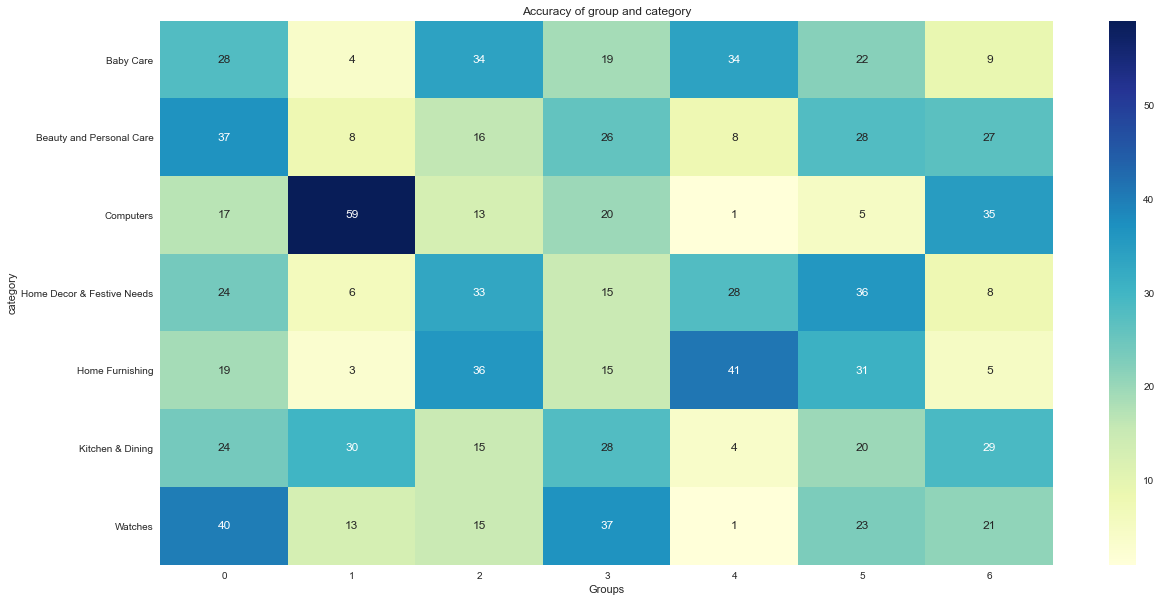

In [121]:
plt.figure(figsize=(20,10))
sns.heatmap(result, cmap="YlGnBu", annot=True,fmt='g')
plt.title('Accuracy of group and category')
plt.show()

In [106]:
df = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

In [107]:
df = df[['uniq_id','product_category_tree']][:len(X_trSVD[:,0])]

In [108]:
df['SVD1'] = X_trSVD[:,0]
df['SVD2'] = X_trSVD[:,1]
df['PCA1'] = X_image_pca[:,0]
df['PCA2'] = X_image_pca[:,1]

In [109]:
df

uniq_id  \
0     55b85ea15a1536d46b7190ad6fff8ce7   
1     7b72c92c2f6c40268628ec5f14c6d590   
2     64d5d4a258243731dc7bbb1eef49ad74   
3     d4684dcdc759dd9cdf41504698d737d8   
4     6325b6870c54cd47be6ebfbffa620ec7   
...                                ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc   
1046  fd6cbcc22efb6b761bd564c28928483c   
1047  5912e037d12774bb73a2048f35a00009   
1048  c3edc504d1b4f0ba6224fa53a43a7ad6   
1049  f2f027ad6a6df617c9f125173da71e44   

                                  product_category_tree        SVD1  \
0     ["Home Furnishing >> Curtains & Accessories >>...  102.426750   
1     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   27.464543   
2     ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   11.946133   
3     ["Home Furnishing >> Bed Linen >> Bedsheets >>...   44.870190   
4     ["Home Furnishing >> Bed Linen >> Bedsheets >>...  174.908567   
...                                                 ...         ...   
1045  ["Baby Care >> Baby & Kids Gifts >> Stickers >...   30.388645   
1046  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  104.458115   
1047  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  151.997769   
1048  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  186.910104   
1049  ["Baby Care >> Baby & Kids Gifts >> Stickers >...  211.769221   

           SVD2       PCA1       PCA2  
0    -54.119262 -18.491174  42.595541  
1    -10.027823 -84.853256 -18.006264  
2     -8.928960 -99.149699 -18.577956  
3    -20.554161 -70.153167  -6.745324  
4     -0.078627  64.080604   8.756577  
...         ...        ...        ...  
1045 -10.838478 -82.032990 -16.201545  
1046 -35.987684 -13.632483  22.796949  
1047 -53.650861  28.687407  43.833394  
1048 -14.299314  69.708920   9.079309  
1049 -21.093255  92.734129  19.799388  

[1050 rows x 6 columns]